In [1]:
import pysat
import rolling_ball as rb
import numpy as np
from scipy.signal import medfilt

/home/jon/anaconda3/lib/python3.7/site-packages/pysat/__init__.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel, DataFrame, Series, datetime
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/__init__.py:78: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Panel, DataFrame, Series, datetime


In [2]:
from datetime import datetime
start = datetime(2008,8,1)
stop = datetime(2008,8,4)
rb.climate_survey(start=start, stop=stop)

No cnofs ivm data for 01 August 2008


/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:971: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pds.datetime(date.year, date.month, date.day)
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:1733: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  elif isinstance(start, pds.datetime) or isinstance(end, pds.datetime):
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_files.py:420: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if isinstance(key.start, pds.datetime):


Returning cnofs ivm data for 02 August 2008
No cnofs ivm data for 01 August 2008
Returning cnofs ivm data for 02 August 2008
0
0.022281964039865713
No Depletions
Loaded Orbit:1
1
0.008139476894531287


/home/jon/Projects/bubble_ball/rolling_ball.py:116: RuntimeWarning: invalid value encountered in sqrt
  return S / a, np.sqrt(b / a + sq_norm(S) / a**2)


Loaded Orbit:2
2
0.018341612305252254
Loaded Orbit:3
3
0.007290928519500307
Loaded Orbit:4
4
0.0060076125805649605
Loaded Orbit:5
5
0.019402362516394378
Loaded Orbit:6
6
0.004751194666761152
Loaded Orbit:7
7
0.01473104663774052
Loaded Orbit:8
8
0.006944027474041333
Loaded Orbit:9
9
0.0050856145712630495
Loaded Orbit:10
10
0.010406063602938963
Loaded Orbit:11
11
0.0365065908471868
Loaded Orbit:12
12
0.009239509117826323
Loaded Orbit:13
13
0.010501774196885966
Loaded Orbit:14
14
0.00399746486917407
Returning cnofs ivm data for 03 August 2008
Loaded Orbit:0
15
0.003772510329296848
Loaded Orbit:1
16
0.003318832324164344
Loaded Orbit:2
17
0.006387136956270622
Loaded Orbit:3
18
0.010218766297359547
Loaded Orbit:4
19
0.009029713524371454
Loaded Orbit:5
20
0.005661003090987611
Loaded Orbit:6
21
0.00583284666692117
Loaded Orbit:7
22
0.005773805466495872
Loaded Orbit:8
23
0.002821165875062643
Loaded Orbit:9
24
0.0025170242455814346
Loaded Orbit:10
25
0.003336857354823095
Loaded Orbit:11
26
0.002

<xarray.DataArray (time: 614, properties: 30)>
array([[3.09000000e+02, 4.04000000e+02, 4.92524994e+02, ...,
        3.71076050e+01, 8.10266174e+03, 8.73165743e-01],
       [6.02000000e+02, 6.86000000e+02, 7.85525024e+02, ...,
        5.19688110e+01, 3.78856262e+03, 8.78553331e-01],
       [7.82000000e+02, 7.97000000e+02, 9.84525024e+02, ...,
        1.00523682e+01, 1.33607056e+03, 3.45691893e-01],
       ...,
       [3.53000000e+02, 4.30000000e+02, 8.42795547e+04, ...,
        4.26196899e+01, 7.24091541e+03, 8.69401876e-01],
       [8.54000000e+02, 9.76000000e+02, 8.47815547e+04, ...,
        1.67322266e+02, 3.70532892e+03, 8.67964678e-01],
       [9.76000000e+02, 1.03200000e+03, 8.49035547e+04, ...,
        8.23935547e+01, 2.83464111e+03, 6.79022266e-01]])
Coordinates:
  * properties  (properties) <U10 'lead' 'trail' 'ut_l' ... 'depth' 'norm_depth'
  * time        (time) datetime64[ns] 2008-08-02T00:08:13 ... 2008-08-04T23:35:04

In [4]:
clean_level = 'none'
info = {'index': 'slt', 'kind': 'local time'}
ivm = pysat.Instrument(platform='cnofs', name='ivm',
                       orbit_info=info, clean_level=clean_level)
#ivm.custom.add(filter_inst, 'modify')
start = pysat.datetime(2008, 8, 2)
stop = pysat.datetime(2008, 8, 2)
ivm.bounds = (start, stop)
#ivm.download(start, stop)
ivm.load(date=start)
ivm.orbits[1]
ivm.data = ivm.data.resample('1S', label='left').ffill(limit=7)

/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.


Returning cnofs ivm data for 02 August 2008
Loaded Orbit:1


In [8]:
#ivm['filt_density'] = medfilt([np.log10(x) for x in ivm['ionDensity']], 7)
idx, = np.where((~np.isnan(ivm['slt']))&(~np.isnan(ivm['filt_density'])))
print(idx)
#ivm.data = ivm.data.iloc[idx]
#
ivm['ionDensity']

[   1    2    3 ... 5826 5827 5828]


In [5]:
orbit = rb.OrbitalBallRoller(ivm)
alpha=400
c=1
result = list(filter(lambda simplex:
                orbit._circumcircle(orbit.points, simplex)[1] > alpha
                and c * orbit._tri_area(simplex) > 0,
                orbit.simplexes))
if result:
    np.stack(result)

0.008139476894531287


In [10]:
orbit.get_alpha_complex(400)
deps = orbit.locate_depletions()
alpha_arr = orbit.alpha_complex
bkg = orbit.get_background()

result


/home/jon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: need at least one array to stack

In [4]:
orbit.get_alpha_complex(400)
print(orbit.alpha_complex)

no result
None


In [6]:
out = orbit.collate_bubble_data()

In [7]:
out

<xarray.DataArray (time: 18, properties: 30)>
array([[ 2.00000000e+00,  1.70000000e+01,  4.09987773e+04,
         4.10137773e+04,  1.10634398e-02,  7.56858587e-02,
         1.90894211e+02,  1.91800934e+02,  9.45098686e+00,
         9.29678154e+00,  2.36448765e+01,  2.37105789e+01,
         9.22178841e+00,  9.17586136e+00,  4.67517120e+02,
         4.70143494e+02,  6.07639954e+02,  6.09477173e+02,
         3.85872734e+04,  4.08066133e+04, -8.09272385e+00,
        -1.04331131e+01,  2.54525938e+04, -1.37468414e+01,
        -1.35161591e+00,  4.00000000e+00,  0.00000000e+00,
         1.83721924e+00,  1.53540195e+04,  3.76263020e-01],
       [ 1.70000000e+01,  5.70000000e+01,  4.10137773e+04,
         4.10537773e+04,  7.56858587e-02,  2.47472346e-01,
         1.91800934e+02,  1.94211090e+02,  9.29678154e+00,
         8.87326050e+00,  2.37105789e+01,  2.38858376e+01,
         9.17586136e+00,  9.04115963e+00,  4.70143494e+02,
         4.77351013e+02,  6.09477173e+02,  6.13663574e+02,
         4.08066133e+04,  4.90137617e+04, -1.04331131e+01,
         2.93759899e+01,  1.95707578e+04, -6.37214050e+01,
         2.95758934e+01,  7.00000000e+00,  0.00000000e+00,
         4.18640137e+00,  2.94430039e+04,  6.00708921e-01],
       [ 5.70000000e+01,  7.70000000e+01,  4.10537773e+04,
         4.10737773e+04,  2.47472346e-01,  3.33078831e-01,
         1.94211090e+02,  1.95411865e+02,  8.87326050e+00,
         8.65530777e+00,  2.38858376e+01,  2.39735088e+01,
         9.04115963e+00,  8.96735191e+00,  4.77351013e+02,
         4.81058960e+02,  6.13663574e+02,  6.15399841e+02,
         4.90137617e+04,  5.28566289e+04,  2.93759899e+01,
         4.83889847e+01,  4.11907031e+04,  2.61547031e+01,
         4.74635620e+01,  7.00000000e+00,  0.00000000e+00,
         1.73626709e+00,  1.16659258e+04,  2.20708850e-01],
       [ 7.70000000e+01,  9.80000000e+01,  4.10737773e+04,
         4.10947773e+04,  3.33078831e-01,  4.22762871e-01,
         1.95411865e+02,  1.96669556e+02,  8.65530777e+00,
         8.42186165e+00,  2.39735088e+01,  6.55999705e-02,
         8.96735191e+00,  8.88540459e+00,  4.81058960e+02,
         4.85029175e+02,  6.15399841e+02,  6.17003906e+02,
         5.28566289e+04,  5.43895586e+04,  4.83889847e+01,
         3.65300293e+01,  4.12374805e+04,  3.80321884e+01,
         5.26628494e+01,  7.00000000e+00,  0.00000000e+00,
         1.60406494e+00,  1.31520781e+04,  2.41812555e-01],
       [ 1.00000000e+02,  1.42000000e+02,  4.10967773e+04,
         4.11387773e+04,  4.31292713e-01,  6.09969616e-01,
         1.96789169e+02,  1.99294342e+02,  8.39938354e+00,
         7.91939878e+00,  7.43720457e-02,  2.58291423e-01,
         8.87736797e+00,  8.69311333e+00,  4.85411377e+02,
         4.93575500e+02,  6.17147461e+02,  6.19759399e+02,
         5.13996914e+04,  3.64717031e+04,  3.29566307e+01,
        -5.23849106e+00,  2.48621777e+04, -4.32473602e+01,
         3.29566307e+01,  7.00000000e+00,  0.00000000e+00,
         2.61193848e+00,  2.65375137e+04,  5.16297140e-01],
       [ 1.42000000e+02,  2.37000000e+02,  4.11387773e+04,
         4.12337773e+04,  6.09969616e-01,  1.01100111e+00,
         1.99294342e+02,  2.04913925e+02,  7.91939878e+00,
         6.77654552e+00,  2.58291423e-01,  6.70031309e-01,
         8.69311333e+00,  8.12640858e+00,  4.93575500e+02,
         5.13023926e+02,  6.19759399e+02,  6.24097656e+02,
         3.64717031e+04,  1.93670723e+04, -5.23849106e+00,
        -1.46351509e+01,  3.63156299e+03, -3.33841019e+01,
         5.38741379e+01,  7.00000000e+00,  4.00000000e+00,
         4.33825684e+00,  3.28401401e+04,  9.00427930e-01],
       [ 2.45000000e+02,  2.85000000e+02,  4.12417773e+04,
         4.12817695e+04,  1.04457676e+00,  1.21199536e+00,
         2.05384216e+02,  2.07728821e+02,  6.67712736e+00,
         6.17278433e+00,  7.04551518e-01,  8.76761138e-01,
         8.07457924e+00,  7.80791712e+00,  5.14717041e+02,
         5.23308899e+02,  6.24428040e+02,  6.26047302e+02,
         1.90720195e+04,  1.91487812e+04, -1.02978363e

In [8]:
len(orbit.depletions)

12

<IPython.core.display.Javascript object>


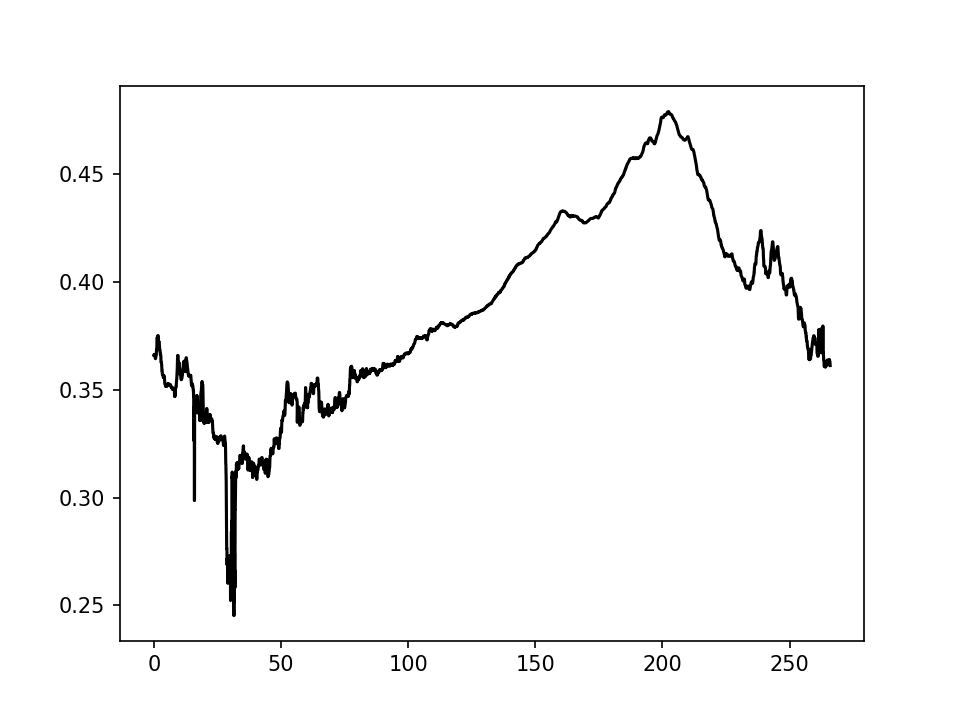

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(orbit.points[:, 0], orbit.points[:, 1], 'k')
#plt.triplot(orbit.points[:, 0], orbit.points[:, 1], alpha_arr, color='tab:blue')
#plt.plot(orbit.points[bkg, 0], orbit.points[bkg, 1], color='tab:green')
#plt.scatter(orbit.points[deps.flatten(), 0], orbit.points[deps.flatten(), 1], marker='x', c='r', zorder=10)

plt.show()

In [27]:
print('orbit_data_length:'+str(len(orbit.points[:,0])))
print('instrument_data_length:'+str(len(ivm['slt'])))

orbit_data_length:5787
instrument_data_length:5787


<IPython.core.display.Javascript object>


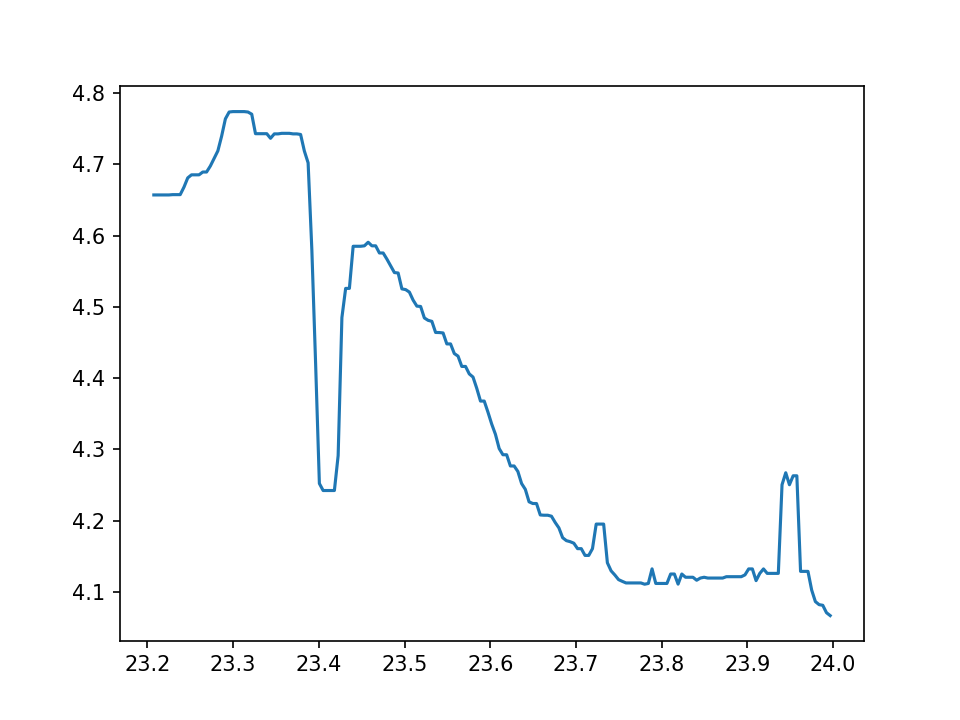

NameError: name 'deps' is not defined

In [12]:
%matplotlib notebook
plt.plot(ivm['slt'], ivm['filt_density'])
plt.scatter(ivm[deps.flatten(), 'slt'], ivm[deps.flatten(), 'filt_density'])

In [41]:
ivm['RPAflag']
ivm.data.index

DatetimeIndex(['2012-01-01 11:18:06', '2012-01-01 11:18:07',
               '2012-01-01 11:18:08', '2012-01-01 11:18:09',
               '2012-01-01 11:18:10', '2012-01-01 11:18:11',
               '2012-01-01 11:18:12', '2012-01-01 11:18:13',
               '2012-01-01 11:18:14', '2012-01-01 11:18:15',
               ...
               '2012-01-01 12:54:23', '2012-01-01 12:54:24',
               '2012-01-01 12:54:25', '2012-01-01 12:54:26',
               '2012-01-01 12:54:27', '2012-01-01 12:54:28',
               '2012-01-01 12:54:29', '2012-01-01 12:54:30',
               '2012-01-01 12:54:31', '2012-01-01 12:54:32'],
              dtype='datetime64[ns]', length=5787, freq='S')

In [5]:
depletions = []
upper_envelope = orbit.get_background()
delta_t = np.diff(orbit.points[upper_envelope, 0])
ind, = np.where(delta_t > 0)
sqsf = np.sqrt(orbit.scale_factor)
print("sqsf")
print(sqsf)
for i in ind:

    lead = upper_envelope[i]
    if orbit.points[lead,0] < 60 or orbit.points[lead,0] > 66:
        continue
#    print("lead:")
#    print(lead)
    trail = upper_envelope[i+1]
#    print("trail:")
#    print(trail)
    d_t = delta_t[i]
    if d_t < 3:
        continue
    print("dt:")
    print(d_t*sqsf)
    dens = orbit.points[lead:trail, 1]
    print("dens")
    print(dens)
    min_edge = (np.min([orbit.points[lead, 1], orbit.points[trail, 1]])) / sqsf
    print("min_edge")
    print(min_edge)
    min_dens = (np.min(dens)) / sqsf
    print("min_dens")
    print(min_dens)
    d_n = (10**min_edge - 10**min_dens) / 10**min_edge
    print("d_n")
    print(d_n)
    print("width_ratio:")
    print((d_t*sqsf)/d_n)
    print("ratio_threshold:")
    print(.6/sqsf)
    if d_n > .1 and (d_t*sqsf)/d_n < .6:
        depletions.append([lead, trail])

sqsf
0.08418909063969596
dt:
0.3635468482971195
dens
[0.36646244 0.36554052 0.36523065 0.36493069 0.36387794 0.36362924
 0.36308681 0.36280255 0.35942322 0.35935    0.35765743 0.35665888
 0.35610095 0.34766426 0.34544977 0.34349875 0.34298    0.34092826
 0.34092826 0.34303568 0.34303568 0.34303568 0.34303568 0.34333508
 0.34333508 0.3444063  0.34333508 0.34285961 0.34285961 0.34333508
 0.34373934 0.3444063  0.34606996 0.34727867 0.34752982 0.34759397
 0.34821063 0.34845663 0.34845663 0.3488209  0.3488209  0.3488209
 0.34898706 0.3492077  0.3492077  0.34898706 0.34789598 0.34789598
 0.34803492 0.34779385 0.34779385 0.3477081  0.34779385 0.34803492
 0.34836101 0.34836101 0.3483708  0.34837422 0.34857117 0.34954848
 0.35017145 0.35023885 0.35072143 0.35090456 0.35156197 0.35329445
 0.35340356 0.35399019 0.35502752 0.35502752 0.35513985 0.3552034
 0.3554761  0.3557891  0.35594643 0.35594643 0.3562663  0.35653684
 0.35695647 0.35706084 0.35721484 0.35722612 0.3573649  0.35841219
 0.36118693

In [22]:
def func():
    return 1
bit = 0

x = func()

if bit == 0 and x is not None:
    print(x)

1
